1.	Perform combined over and under sampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus
from IPython.display import Image


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Below are the neccessary libraries for SMOTE-ENN
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

In [14]:
from collections import Counter

In [17]:
diabetes_df = pd.read_csv("diabetes copy2.csv") 
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Evaluating Dataset...

In [18]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [19]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## SMOTE-ENN

In [20]:
#Split the Features (X) and Target (Y)
y=diabetes_df['Outcome'].values
X=diabetes_df.drop('Outcome',axis=1)

In [25]:
##Using SMOTE-ENN to balance the data

#Define model: 
    #This model does the following:
    #1. Random sample of data is used for training the model
    #2. Then, the next version of the model compensate for the weaknesses of the previous model. 
    #3. So with each iteration, the model gets better and eventually becomes a strong predictor. 
#AdaBoost can be used to boost the performance of any machine learning algorithm. In this case it is
#boosting the performance of the SMOTEENN. 
model=AdaBoostClassifier()

#Define SMOTE-ENN:

#the sampling_strategy used is 'all' since the ENN purpose is to delete observations from both of the classes 
# where the observation's class is different than its KNN majority class. ASK ABOUT THIS!!
resample=SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='all'))

#Define pipeline:
    #Pipeline is a sequence of data processing steps. Here I have identified the functions (resample and model)
    #I want in the data processing steps
pipeline=Pipeline(steps=[('r', resample), ('m', model)])

#Define evaluation procedure (here we use Repeated Stratified K-Fold CV) 10 even groups
#Why we do a cross validation:
    # when calculating the accuracy score (R2), this score is dependent on the way that you split the data.
    # Sometimes the test set can contain some things that skew the accuracy score so this is why it is
    # important to have different train sets (10 even groups).
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.7322
Mean Precision: 0.7271
Mean Recall: 0.7459


In [29]:
#fit the new data 
X_res, y_res = resample.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 289, 0: 229})


In [31]:
X_res

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,89,66,23,94,28.100000,0.167000,21
1,4,110,92,0,0,37.600000,0.191000,30
2,8,99,84,0,0,35.400000,0.388000,50
3,1,97,66,15,140,23.200000,0.487000,22
4,5,117,92,0,0,34.100000,0.337000,38
...,...,...,...,...,...,...,...,...
513,3,147,91,0,0,31.254453,0.575211,61
514,9,155,92,47,234,37.600000,0.671521,47
515,5,143,82,26,286,32.262898,0.454775,58
516,7,129,67,0,0,33.228964,0.580238,45


In [32]:
y_res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

## How Combined Sampling Works

### The following is one way combined sampling can work:

Scenario: Dataset with a 1:100 class distribution-

- 1) Apply oversampling (duplicate examples from minority group) to increase the ratio to 1:10

            Sampling_strategy = 0.1 (10%) 
            
- 2) Then, apply undersampling (delete from majority group) to improve the ratio to 1:2

            Sampling_strategy = 0.5 (50%)

        
Combined sampling is done to increase model performance even more than just doing over or under sampling.         

We can do combinded sampling by applying SMOTE and ENN (SMOTE-ENN) because SMOTE is a oversampling techinique and ENN is a undersampling techinique. 

- SMOTE is an oversampling method where minority class samples are generated. In some oversampling techniques, the data from the minority class is simply duplicated. This does not produce any new information. SMOTE helps solve this issue because it generates synthetic minority data. 
    

- The ENN method works by: 

    1) Finding the KNN of each unknown observation/new data pt/test pt 

    2) Check whether the majority class from the observation’s KNN is the same as the observation’s class or not. 

    3) If the majority class of the observation’s KNN is different from the observation’s class then both the observaton and the KNN are removed. 

    4) The steps above are repeated until the right proprotion is reached. 

2.	Perform logistic regression with the new data from question 1. 

In [35]:
from sklearn.linear_model import LogisticRegression

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state=42, stratify=y_res)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

#Logistic regression approach
regression = LogisticRegression(random_state=0).fit(X_train, y_train)
y_predicted = regression.predict(X_test)


regression.score(X_test, y_test)

0.9326923076923077

In [36]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.95      0.93      0.94        58

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104



a.	Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset.

The above classification report is saying for all of the '0s' (Not diabetic or true negatives), there was a 91% precision in our prediction (I was 91% correct in predicting true negatives.) For all the '1s' (Diabetic or true positives) there was a 95% precison. (I was 95% correct in predicting true positives.)

The recall values are also high with both recalls being 93%. So out of all the data that was true negative or true positive, the model was able to ctahc 93% of it. 

In week 14's hw I used only highly correlated features to see if that affected the performance of the logistic regression model. This didn't make a whole lot of difference since accuracy was still at 70% in spite of using specific features. Compared to that, the logistic regression performance here after doing combined sampleing is much better.

- Just doing oversampling--SMOTE

- decision trees

3.	Create an ROC Curve for the model 
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html and calculate the AUC. 

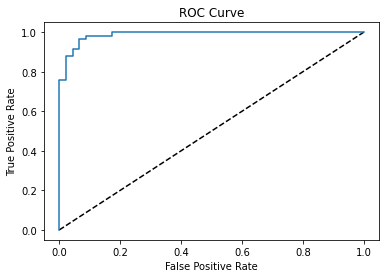

In [41]:
# To plot the ROC curve, the following needs to be imported
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression


# Compute predicted probabilities (evaluate logistic regression model's performance by plotting an ROC curve)
    #Classifiers in scikit-learn (like LR) have a .predict_proba() method which returns the probability of a 
    #given sample being in a particular class.   
# regression refers to logistic regression
y_pred_prob = regression.predict_proba(X_test)[:,1]

# Generate ROC curve values: false positive rate, true positive rate, thresholds
    #Pass in y_test and y_pred_prob (test labels and predicted outcomes/probabilities) 
    #to the roc_curve() function and separate the result into the 3 variables 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve: plot the FPR and TPR:
# It is a plot of the false positive rate (x-axis, false alarm rate/incorrectly diabetic) versus the 
#true positive rate (y-axis, hit rate/truely diabetic) for a number of different threshold values (0 to 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(y_test, y_pred_prob)
print('AUC: %.3f' % auc)

AUC: 0.988


a.	BRIEFLY explain what the ROC Curve shows and what the resulting AUC means. 

### ROC Curve

The ROC curve or receiver operating characteristic curve is the set of points we get when tryng all the possible thresholds. It is a useful tool when doing predictions with two outcomes.  


According to the ROC curve, the two classes overlap since the "curve" does not have a 90 degree angle at (0,1). This means that the logistic regresson model does not have 100% distinguishing abilities (distingusihing between the postive (diabetic) and negative (non-diabetic) classes.) 

EX: 20% FPR means a 99% TPR

### AUC (Area Under The Curve): 

ROC is a probability curve and AUC tells how much the model is capable of distinguishing between classes. So a high AUC score would be what we're looking for. In this case the AUC score is 98%. This means that there is 98% chance that the logistic regression model will be able to differentiate between diabetic and non-diabetic. 



4.	What is outlier detection? Why is it useful? What methods can you use for outlier detection?

Outlier detction is the process of detecting outliers in a dataset that can skew the data and influence our overall understanding of the data set. Outliers are those points that deviate from the rest of the observations in the data. 

Some types of outlier detections are Z-score, Dbscan and Isolation forests.

- Z-score: this score indicates how many standard deviations a data point is from the average.
- Dbscan (Density Based Spatial Clustering of Applications with Noise): This is a clustering algorith that groups together points that are close in proximity and as a result it also points out the outliers since they are in low-density regions. 

- Isolation Forests: this method works by selecting a column and its values at random in order to separate different parts of the data. 

5.	Perform a linear SVM to predict credit approval (last column) using this dataset: 

https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 . 

Make sure you look at the accompanying document that describes the data in the dat file. You will need to either convert this data to another file type or import the dat file to python. 

You can use this code, but otherwise you follow standard practices we have already used many times: 


- from sklearn.svm import SVC
- classifier = SVC(kernel='linear')



In [50]:
#load the .dat file as an array
australia_array = sed = np.loadtxt('australian.dat')
australia_array

array([[1.000e+00, 2.208e+01, 1.146e+01, ..., 1.000e+02, 1.213e+03,
        0.000e+00],
       [0.000e+00, 2.267e+01, 7.000e+00, ..., 1.600e+02, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.958e+01, 1.750e+00, ..., 2.800e+02, 1.000e+00,
        0.000e+00],
       ...,
       [0.000e+00, 1.883e+01, 9.540e+00, ..., 1.000e+02, 1.000e+00,
        1.000e+00],
       [0.000e+00, 2.742e+01, 1.450e+01, ..., 1.200e+02, 1.200e+01,
        1.000e+00],
       [1.000e+00, 4.100e+01, 4.000e-02, ..., 5.600e+02, 1.000e+00,
        1.000e+00]])

In [61]:
#Convert the array to a dataframe
australia_df = pd.DataFrame(australia_array)
australia_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0,0.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0,0.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0,1.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0,1.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0,12.0,1.0


In [62]:
#new column names assigned
australia_df.columns = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10", "A11", "A12", "A13", "A14", "A15"]

In [63]:
#check new names
australia_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1.0,22.08,11.460,2.0,4.0,4.0,1.585,0.0,0.0,0.0,1.0,2.0,100.0,1213.0,0.0
1,0.0,22.67,7.000,2.0,8.0,4.0,0.165,0.0,0.0,0.0,0.0,2.0,160.0,1.0,0.0
2,0.0,29.58,1.750,1.0,4.0,4.0,1.250,0.0,0.0,0.0,1.0,2.0,280.0,1.0,0.0
3,0.0,21.67,11.500,1.0,5.0,3.0,0.000,1.0,1.0,11.0,1.0,2.0,0.0,1.0,1.0
4,1.0,20.17,8.170,2.0,6.0,4.0,1.960,1.0,1.0,14.0,0.0,2.0,60.0,159.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,31.57,10.500,2.0,14.0,4.0,6.500,1.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0
686,1.0,20.67,0.415,2.0,8.0,4.0,0.125,0.0,0.0,0.0,0.0,2.0,0.0,45.0,0.0
687,0.0,18.83,9.540,2.0,6.0,4.0,0.085,1.0,0.0,0.0,0.0,2.0,100.0,1.0,1.0
688,0.0,27.42,14.500,2.0,14.0,8.0,3.085,1.0,1.0,1.0,0.0,2.0,120.0,12.0,1.0


In [66]:
#Split the Features (X) and Target (Y)
data = australia_df.drop('A15',axis=1) #X
target = australia_df['A15'] #y


# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=42, stratify=target)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [67]:
from sklearn.svm import LinearSVC
classifier = SVC(kernel='linear')

svm = LinearSVC()

svm.fit(X_train, y_train)

svm.score(X_train, y_train)

0.8786231884057971

In [70]:
y_pred2 = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred2)
print(cm)

[[55 22]
 [ 4 57]]


In [71]:
CR = classification_report(y_test, y_pred2)
print(CR)

              precision    recall  f1-score   support

         0.0       0.93      0.71      0.81        77
         1.0       0.72      0.93      0.81        61

    accuracy                           0.81       138
   macro avg       0.83      0.82      0.81       138
weighted avg       0.84      0.81      0.81       138



a.	How did the SVM model perform? 

## Background on LinearSVC

- Basic Support Vector Machine (SVM) classifier is called Linear support vector classifier (LinearSVC). 

- SVMs are supervised machine learning algorithms. 

### What is SVM  (and LinearSVC) ?

- SVM is an algorithm that finds a hyperplane or line that separates the labeled dataset into two classes.

- The support vectors are those data points are closest to the hyperplane and they are crutial in detremining the placement of the hyperplane because removing the points would alter the posiiton of the "decision line".

- How is a hyperplane formed? Through determining the exact margin. 

        Margin is the distance between the hyperplane and the closest point from either set.
        
        EXACT MARGIN:
        
        - Maximum possible margin between the hyperplane and any point in the data. So that the hyperplane  
        gives a fair chance to classify new data correctly.

### Predicting Test Data (after performing LinearSVC)

- When new data (test set) is added, whatever side of the hyperplane it goes will determine the class of the test. 

## SVM MODEL PERFORMANCE:

The SVM model seems to have performed pretty well given the precision and recall scores are high for both true negatives and true positives. Additionally the accuracy (r squared) score is also high. 

A precision score of 93% for true negatives indicates that out of the values that were predicted as negatives by the model, 93% were true negatives. 


A Recall score of 71% for true negatives indicates that out of total amount of true negatives, the model caught 71% of them.

6.	What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words. 

### Business Analyst

Business analysts look at  past and present business data and evaluate it with the goal of improving decision-making. They are between IT and business.  

### Business Analyst Job Roles:

- Create a analysis includeing pointing out problems, and their solutions
- Budgeting and predicting
- Variance analysis
- Defining business requirements and reporting them back to stakeholders

NOT TO SELF: 

- Not all business analysts need a IT background, they just need a basic idea of how programming works.
      
- SQL knowledge is a prerequisite for almost any business analyst job
- Python skills is required sometimes

### Data Analysis

- Create and continue to update data systems and databases; 
    - Fixing coding errors
- Discover patterns in data--look at primary and secondary sources (WHAT DOES THIS ENTAIL?) 
- Reorganize data in a readable format. 
- Interprete data sets with statistical tools
    -Like predictiing future points 
- Prep data reports for audience (teammates)    
    - Communicate trends, patterns, and predictions     
